<a href="https://colab.research.google.com/github/g-Sophia-ly/Telco-Customer-Churn/blob/main/Telco_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Look at the Business Context

* Goal:  
  A telecommunications company has noticed an increase in customer churn and wants to predict which customers are most likely to churn.
* Core question:   
  Who is most likely to churn?   
  Why are these customers likely to churn?  
  What can the company do to retain these customers?


---



# 2. Explore the Data
## 2.1 Introduction for the data
* Churn: Customers who left within the last month
* tebnure: Number of months the customer has stayed with the company
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

In [57]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import kagglehub
warnings.filterwarnings('ignore')

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score

In [60]:
# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/telco-customer-churn


In [61]:
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [62]:
df.shape

(7043, 21)

In [63]:
df.info()
df.describe()
df['Churn'].value_counts(normalize=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,proportion
Churn,
No,0.73463
Yes,0.26537


* From the result we can observe that it has no peculiar pattern that stands out. In fact there is no missing data.
* The target the we will use to guide the exploration is Churn


---



###  2.2 Data Manipulation

* In the previous step of the analysis we found that the expected data type of
the TotalCharges column should be float, but the result shows object,
indicating that there may be an outlier in this column

In [64]:
df = df.drop(['customerID'], axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [66]:
df[np.isnan(df['TotalCharges'])].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

* These NaNs occur exactly on the lines where tenure = 0 (customers who just opened an account)

In [67]:
df[df['tenure']==0].index

Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

* There are no additional missing values in the Tenure column.  
Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [68]:
df.drop(labels=df[df['tenure']==0].index, axis=0, inplace=True)

In [69]:
df[df['tenure']==0].index

Index([], dtype='int64')

In [70]:
df.isna().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


## 3. Data Visualization

- In order to observe more intuitively the interrelationships between individual features, a correlation analysis of all the features was performed using a heat map, which can identify whether there is a strong positive or negative correlation between the features at a macroscopic level.

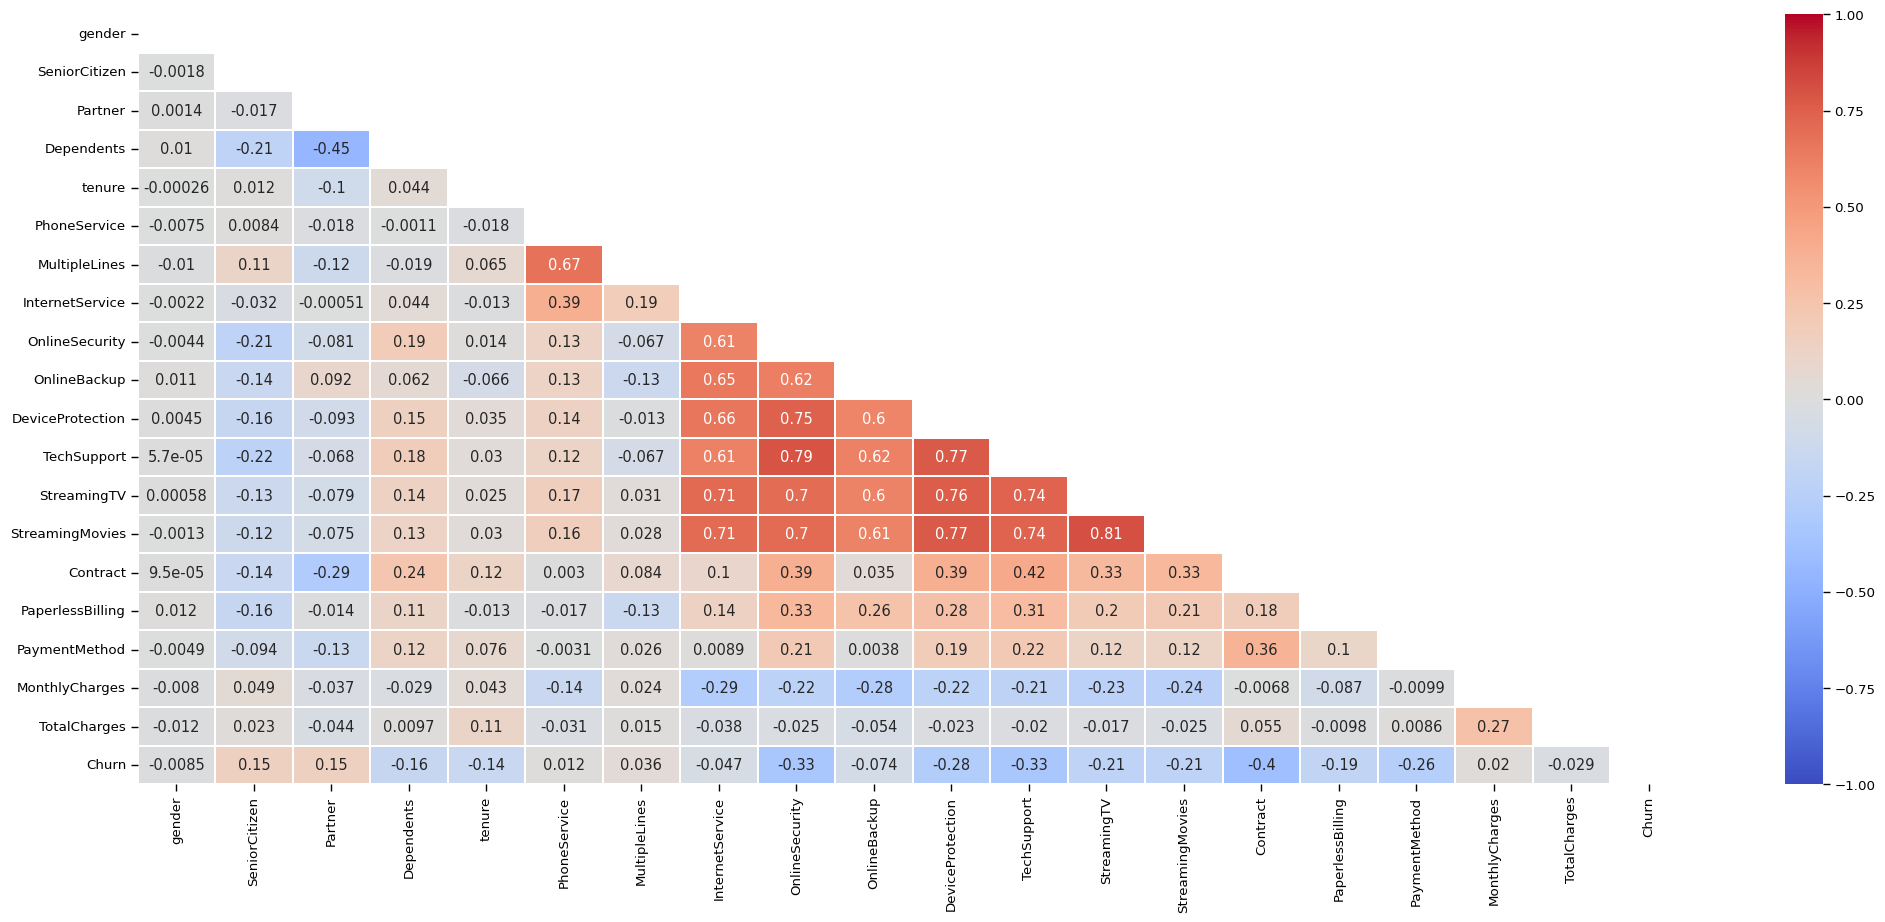

In [71]:
plt.figure(figsize=(25, 10))
corr = df.apply(lambda x: pd.factorize(x)[0]).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

- Exploring the relationship between churn and contract (corr_value=0.4)

In [72]:
# Each type of contract is displayed side-by-side (not stacked) under the same Churn category
fig = px.histogram(df, x="Churn", color="Contract", barmode="group", color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

In [73]:
table = pd.crosstab(df['Contract'], df['Churn'])
table['Churn Rate'] = round(table['Yes'] / (table['Yes'] + table['No']), 3)
table

Churn,No,Yes,Churn Rate
Contract,,,
Month-to-month,2220,1655,0.427
One year,1306,166,0.113
Two year,1637,48,0.028


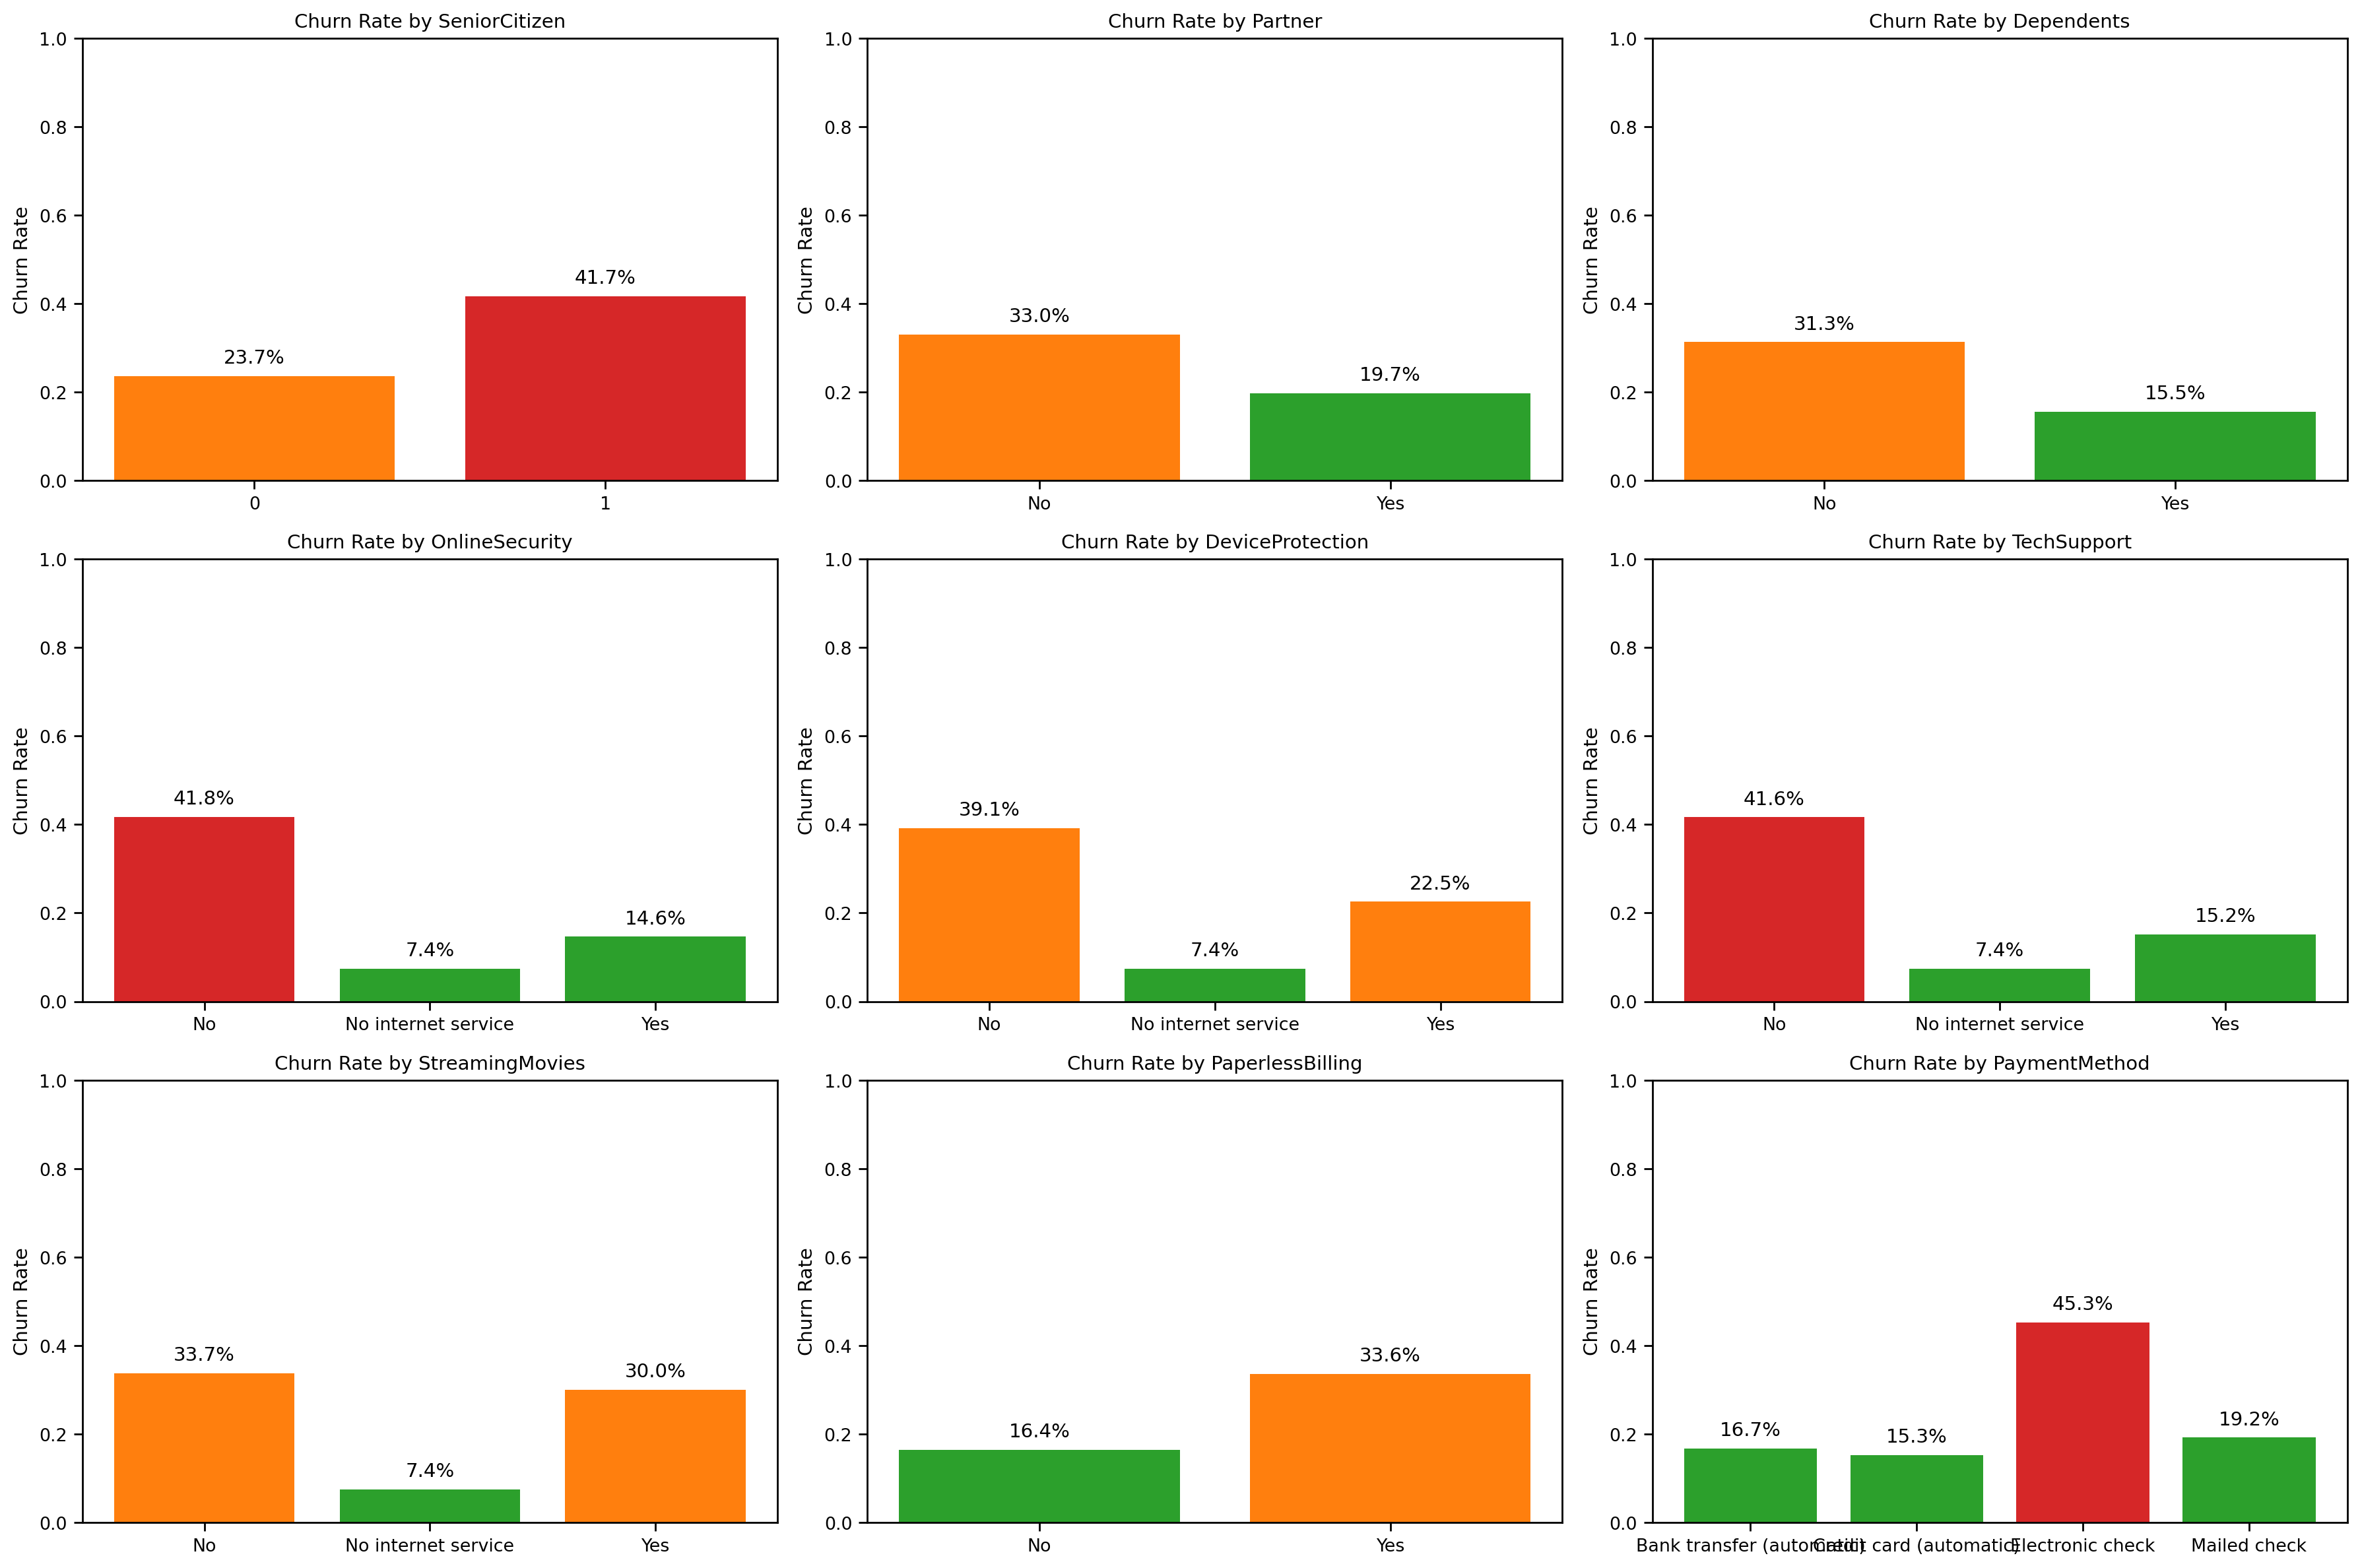

In [74]:
features = ['SeniorCitizen', 'Partner', 'Dependents',
            'OnlineSecurity', 'DeviceProtection', 'TechSupport',
            'StreamingMovies', 'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(3, 3, figsize=(18, 12), dpi=200)
axes = axes.flatten()

def get_color(rate):
    if rate >= 0.4:
        return '#d62728'  # high churn
    elif rate >= 0.2:
        return '#ff7f0e'  # median churn
    else:
        return '#2ca02c'  # low churn

for i, feature in enumerate(features):
    ax = axes[i]

    rate_df = (
        df.groupby(feature)['Churn']
        .value_counts(normalize=True)
        .unstack()
        .fillna(0)
    )
    rate_df['ChurnRate'] = rate_df['Yes']

    x_labels = rate_df.index.astype(str)
    y_vals = rate_df['ChurnRate']
    bar_colors = [get_color(val) for val in y_vals]

    bars = ax.bar(x_labels, y_vals, color=bar_colors)
    ax.set_title(f'Churn Rate by {feature}')
    ax.set_ylim(0, 1)
    ax.set_ylabel('Churn Rate')

    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 0.02,
                f'{height:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


### Based on the visualized churn rate analysis, we can draw the following key insights:
* Senior citizens exhibit a significantly higher churn rate, exceeding 40%, which is much higher than that of non-senior customers.
* Internet-related services play a crucial role in customer retention. The absence of Online Security, Device Protection, Tech Support, or Streaming Movies is consistently associated with higher churn, suggesting that these add-on services contribute positively to user stickiness.
* ayment method is closely linked to churn behavior. Customers who use Electronic Check have the highest churn rate, whereas those using Credit Card, Bank Transfer, or Automatic Payment tend to be more loyal.
* Customers without a partner or dependents are more likely to churn. Their churn rate is roughly double that of those with partners or dependents, potentially reflecting greater lifestyle stability among retained users.
* Paperless billing users also demonstrate a higher churn rate, nearly twice that of those who opt for paper bills, reaching around 35%. This may indicate a more mobile and digital-savvy user base with lower long-term retention.

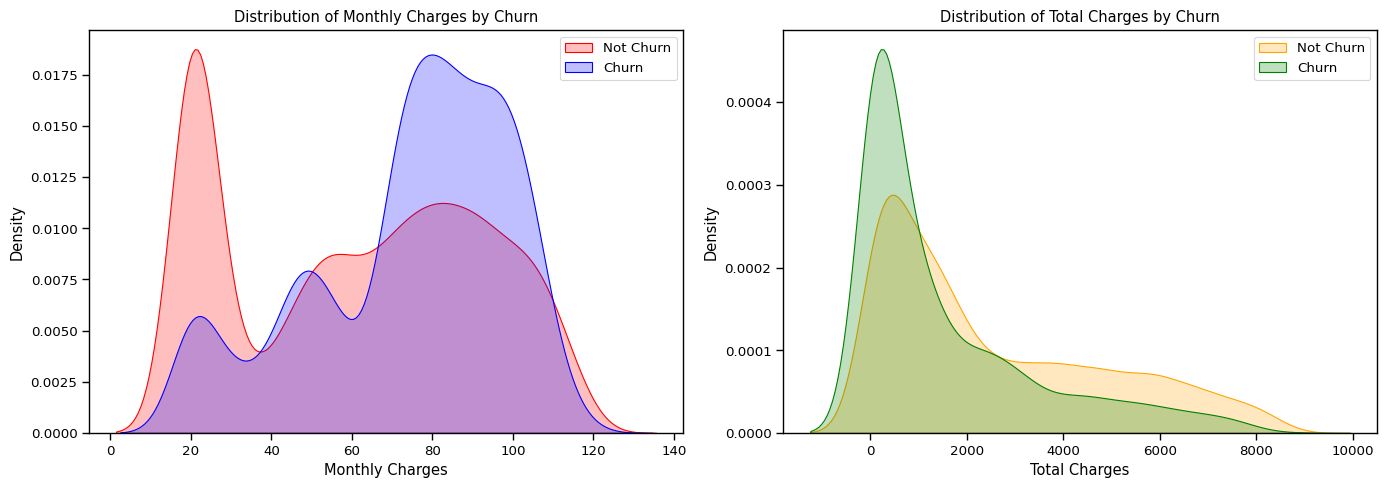

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), dpi=100)

sns.set_context("paper", font_scale=1.1)

sns.kdeplot(
    df['MonthlyCharges'][df['Churn'] == 'No'],
    ax=axes[0], color="Red", label='Not Churn', shade=True
)
sns.kdeplot(
    df['MonthlyCharges'][df['Churn'] == 'Yes'],
    ax=axes[0], color="Blue", label='Churn', shade=True
)
axes[0].set_title('Distribution of Monthly Charges by Churn')
axes[0].set_xlabel('Monthly Charges')
axes[0].set_ylabel('Density')
axes[0].legend(loc='upper right')

sns.kdeplot(
    df['TotalCharges'][df['Churn'] == 'No'].dropna(),
    ax=axes[1], color="Orange", label='Not Churn', shade=True
)
sns.kdeplot(
    df['TotalCharges'][df['Churn'] == 'Yes'].dropna(),
    ax=axes[1], color="Green", label='Churn', shade=True
)
axes[1].set_title('Distribution of Total Charges by Churn')
axes[1].set_xlabel('Total Charges')
axes[1].set_ylabel('Density')
axes[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

- Customers with higher Monthly Charges are also more likely to churn
- Churn is more common among customers with low total charges, indicating early-stage churners;
- Customers with high cumulative charges are more likely to stay, suggesting stronger loyalty over time;
- TotalCharges is a meaningful feature for predicting customer churn.

In [76]:
fig = px.box(df, x='Churn', y = 'tenure')

fig.update_yaxes(title_text='Tenure', row=1, col=1)
fig.update_xaxes(title_text='Churn', row=1, col=1)

fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Tenure vs Churn</b>',
)
fig.show()

- Losses tend to be concentrated in the early years (first 10 months)

### 4. Data Processing

In [77]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype == 'object':
        le = LabelEncoder()
        dataframe_series = le.fit_transform(dataframe_series)
    return dataframe_series

df = df.apply(lambda x: object_to_int(x))
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [78]:
df.corr()['Churn'].sort_values(ascending = False)

,Churn
Churn,1.000000
MonthlyCharges,0.192858
PaperlessBilling,0.191454
SeniorCitizen,0.150541
PaymentMethod,0.107852
MultipleLines,0.038043
PhoneService,0.011691
gender,-0.008545
StreamingTV,-0.036303
StreamingMovies,-0.038802


In [79]:
X = df.drop(columns=['Churn'])
y = df['Churn'].values

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

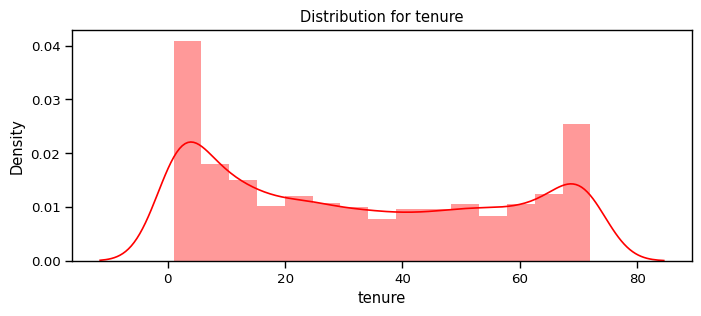

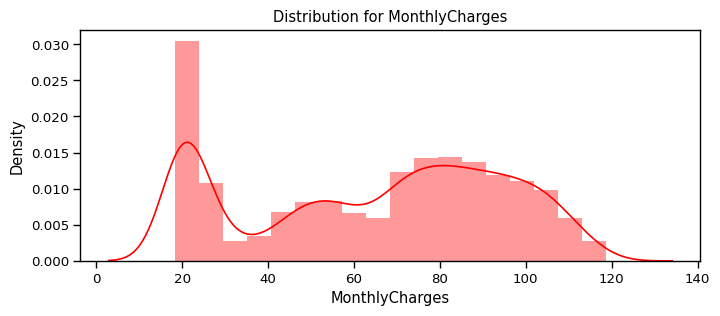

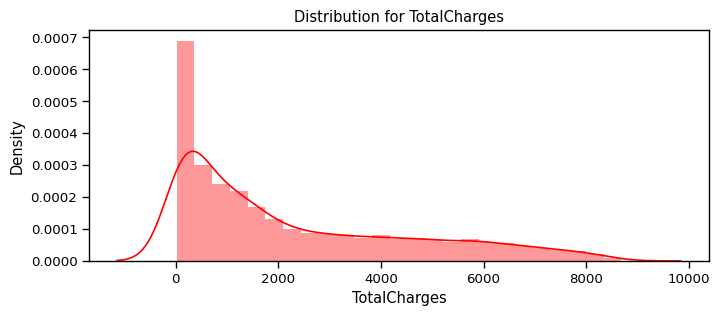

In [81]:
def distplot(feature, frame, color='r'):
    plt.figure(figsize=(8,3), dpi=100)
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color= color)

num_cols = ["tenure", 'MonthlyCharges', 'TotalCharges']
for feat in num_cols: distplot(feat, df)

- Standardizing numeric attributes

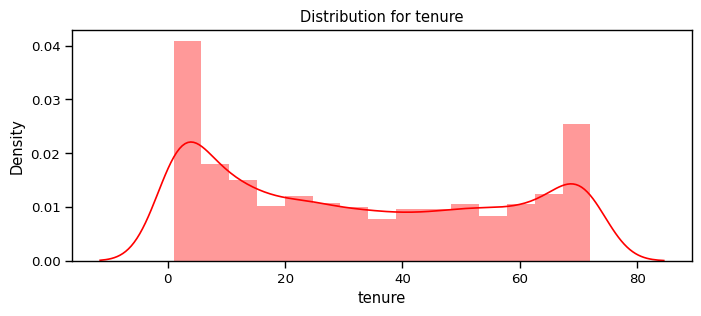

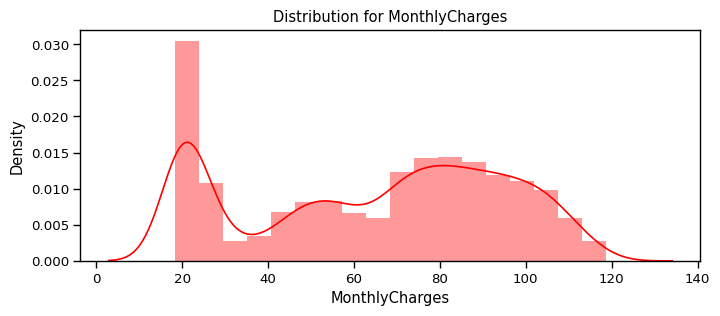

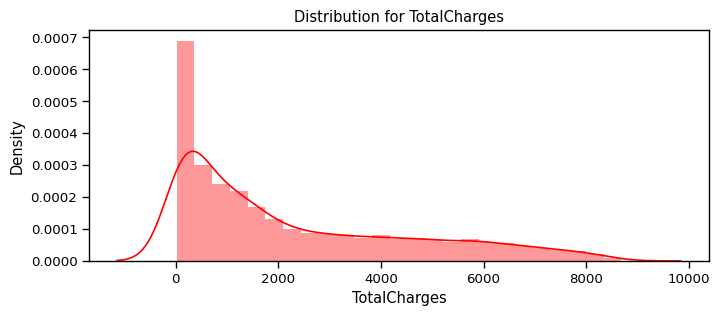

In [82]:
df_std = pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype('float64')), columns=num_cols)
for feat in num_cols: distplot(feat, df)

In [83]:
scaler = StandardScaler()

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

## 5. Model Evaluations and Predictions

In [84]:
X_resampled, y_resampled = SMOTE().fit_resample(X_train, y_train)

### KNN

- Churn is Yes/No, a typical binary classification task, and KNN is a common classification model. For a new customer, KNN will find the K customers in the training set with the “closest” features, and see if most of these neighbors are churned, if most of them are churned, the model predicts that the new customer will be churned as well.

In [85]:
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)

KNN accuracy: 0.7758293838862559


In [86]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.59      0.52      0.55       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



### SVC

In [87]:
svc_model = SVC(random_state = 1)
svc_model.fit(X_train,y_train)
svc = SVC(class_weight='balanced')
predict_y = svc_model.predict(X_test)
accuracy_svc = svc_model.score(X_test,y_test)
print("SVM accuracy is :",accuracy_svc)

SVM accuracy is : 0.8075829383886256


In [88]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



### Logistic Regression

In [99]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression accuracy is :",accuracy_lr)

Logistic Regression accuracy is : 0.8090047393364929


In [100]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



### Random Forest

In [89]:
model_rf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1, random_state=50, max_features="sqrt", max_leaf_nodes=30)
model_rf.fit(X_train, y_train)
prediction_test = model_rf.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8137440758293839


In [90]:
print(classification_report(y_test, predict_y))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.69      0.50      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



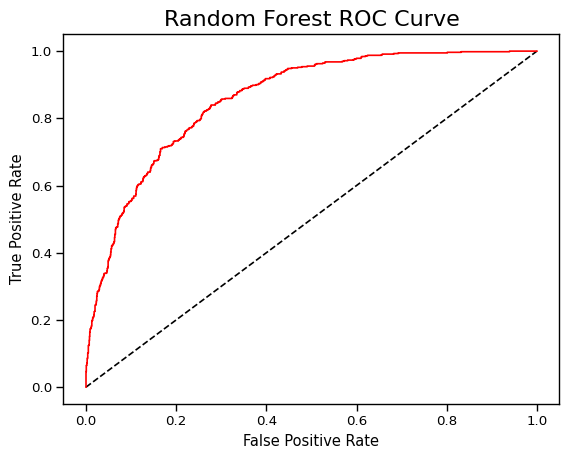

AUC Score: 0.8595989132198453


In [94]:
y_rfpred_prob = model_rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();
print("AUC Score:", roc_auc_score(y_test, y_rfpred_prob))

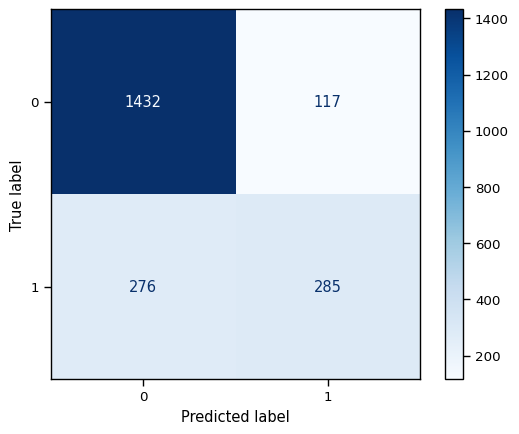

In [101]:
ConfusionMatrixDisplay.from_estimator(model_rf, X_test, y_test, cmap='Blues')

- From the confusion matrix we can see that: There are total 1432+117=1549 actual non-churn values and the algorithm predicts 1432 of them as non churn and 149 of them as churn. While there are 276+285=561 actual churn values and the algorithm predicts 276 of them as non churn values and 385 of them as churn values.

Customer churn poses a significant threat to a firm’s profitability, especially in competitive industries like telecommunications. The most effective way to mitigate churn is for companies to deeply understand their customers—particularly those at high risk of leaving. By leveraging predictive analytics to identify such customers, firms can take targeted actions to improve satisfaction.

Our analysis shows that short-term contracts, high monthly charges, and electronic billing are strongly associated with higher churn likelihood. Therefore, enhancing customer service quality, offering personalized retention incentives, and promoting long-term contract plans can be effective strategies. Additionally, building customer loyalty through tailored experiences and proactive engagement is essential. Some firms also survey churned customers to better understand their reasons for leaving, enabling data-driven strategies to prevent future churn.